In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import numpy as np

En este bloque de codigo se importan las librerias que usaremos, las usuales como pandas, numpy y matplotlib esenciales para los modelos con los que trabajamo tipo el machine learning, tambien estaremos usando modulos de sklearn pero con otro proposito aparte de separar los datos para la evaluacion, normalizaremos los datos (estandarizarlos), usarmos el algoritmo KNN, metricas de evaluacion y agrupamiento no supervisado

In [2]:
# File paths
train_path = "train.csv"
test_path = "test.csv"

In [3]:
# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

En estas dos cajas de codigo estamos haciendo los paths para poner los csv en el codigo y tener la capacidad de hacerlos dataframes con la funcion de pandas, si no me equivoco estamos poniendo los nombres de los csv en variables para que no haya complicaciones.

In [4]:
test_df.head()

,Fruit Size,Fruit Color,Leaf Size
0,88,24,3
1,37,24,30
2,58,13,3
3,17,45,73
4,31,80,81


In [5]:
train_df.head()

,Fruit Size,Fruit Color,Leaf Size,label
0,60,16,20,0
1,36,34,15,0
2,94,33,15,0
3,36,67,72,1
4,99,61,3,0


En estas dos cajas de codigo estamos poniendo como output los headings de los dataframes que contienen los datos con los que estaremos haciendo pues los enternamientos y las pruebas, si no me equivoco solo es para poner referencia de los datos que se propciornan para saber lo que prueban y entrenan los modelos.

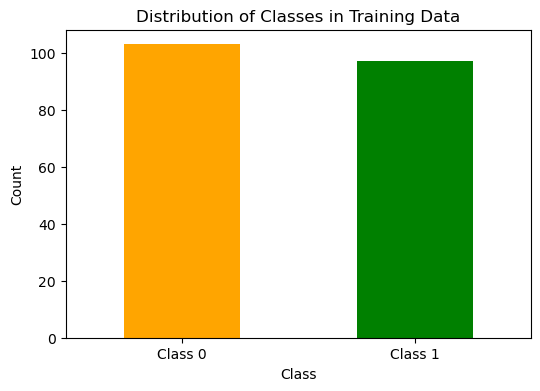

In [6]:
# Visualizing class distribution
plt.figure(figsize=(6,4))
train_df['label'].value_counts().plot(kind='bar', color=['orange', 'green'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Classes in Training Data")
plt.xticks(ticks=[0, 1], labels=["Class 0", "Class 1"], rotation=0)
plt.show()

Aqui si hizo un grafica para comparar la distribucion de clases con o en los datos de con lo que se va a entrenar, pues las clases para mi signficaron como el ejemplo que nos dio en clase de o los enfermos y los no enfermos

In [7]:
# Preparing data
X_train = train_df.drop(columns=['label'])
y_train = train_df['label'] 
X_test = test_df.copy()

En este bloque de codigo se esta preperando pues los datos de entrenamiento con x & y con los labels el x de train solo trabajando sin las columnas de labels si no me equivoco y el 'y' con ellas, mientras que solo hay una variable para las pruebas la cual solo copio el dataframe del test

In [8]:
# Split training data for evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

En este bloque de codigo como en anterories modelos se separan los datos de prueba y entrenamiento en una variable con varios argumentos usando el modulo de sklearn para ello

In [9]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

En este bloque de codigo empezamos encerrando la funcion de el modulo skelarn que normaliza los datos y normalizamos los datos atrapandolas en variables, las cuales pues contienn los datos normalizados, perdon por la redundancia

In [10]:
# Split training data for evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Bueno pues los dos ultimos bloques de codigo juntados.

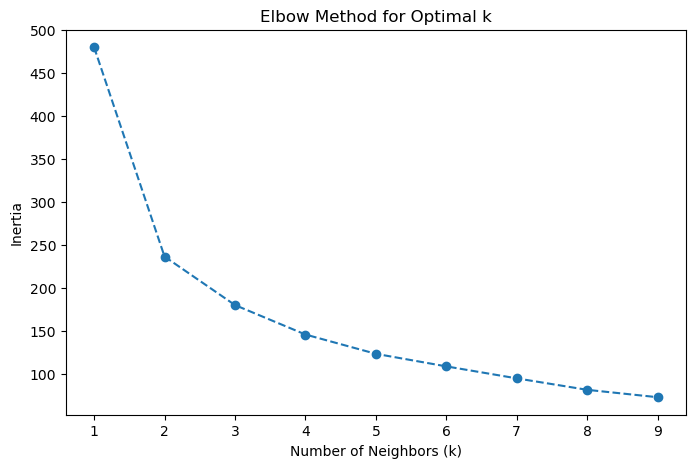

In [11]:
# Determine optimal k using the Elbow Method
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

Por lo que entendi este bloque de codigo lo que hace es que calcula la inercia para diferentes valores de k (numero de vecinos) en este caso del 1 al 9, si no me equivoco entre menor inercia hay clusters (numero de vecinos) mas densos y mejores definidos, aqui el graficar el codo sirve para que al añadir mas clusters no mejore la inercia y el resultado esperado sea una curva como la que estamos viendo.

In [12]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train_split)

KNeighborsClassifier(n_neighbors=3)

Pues aqui como lo dice el comentario se esta entrenando el modelo KNN, primero haciendo un classifier con el argumento siendo el numero de vecinos con los cuales se tomara una decision y pues como nos explico se usa numeros impares para llegar una conclusion y no lidiar con empates y cosas asi.

In [13]:
# Predictions on validation set
y_val_pred = knn.predict(X_val_scaled)

Aqui se esta haciendo en una variable para ver el rendimiento con una prediccion con el modelo knn antes mencionadndo usando los datos de validacion como argumento

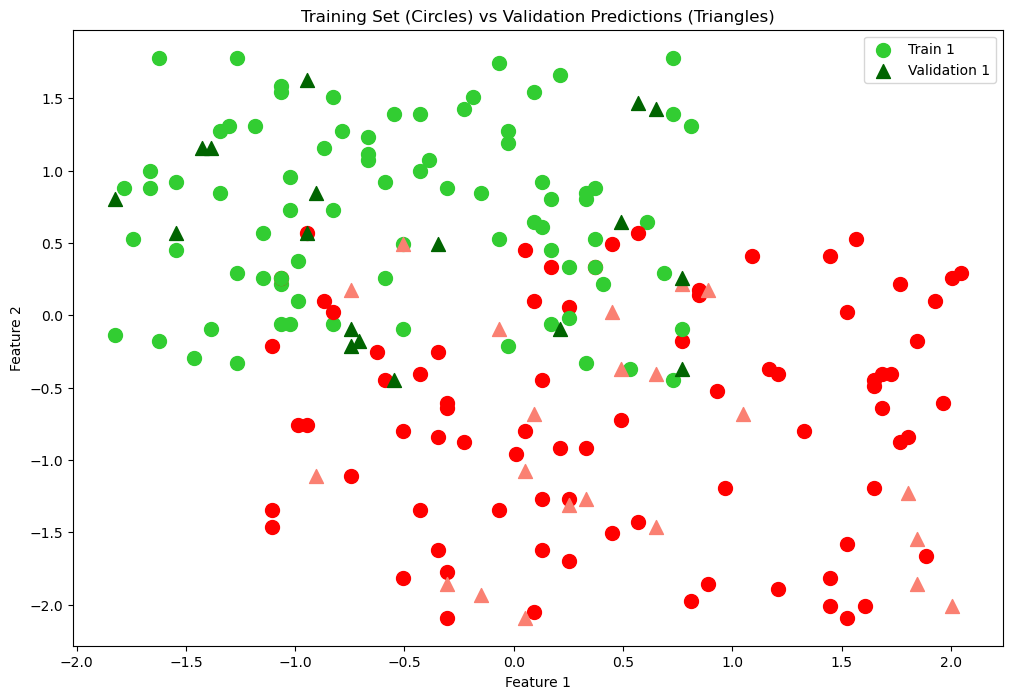

In [14]:
# Improved Plot: Training and Validation Sets with Labels
plt.figure(figsize=(12, 8))

# Plot training set with circles
for i, label in enumerate(y_train_split):
    color = 'red' if label == 0 else 'limegreen'
    plt.scatter(X_train_scaled[i, 0], X_train_scaled[i, 1], color=color, marker='o', s=100, label=f"Train {label}" if i == 0 else "")

# Plot validation set with triangles
for i, label in enumerate(y_val_pred):
    color = 'salmon' if label == 0 else 'darkgreen'
    plt.scatter(X_val_scaled[i, 0], X_val_scaled[i, 1], color=color, marker='^', s=100, label=f"Validation {label}" if i == 0 else "")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Set (Circles) vs Validation Predictions (Triangles)")
plt.legend()
plt.show()


Aqui se esta haciendo una grafica comparando el training set represntando con circulos y las predcciones con los datos de validacion represantdo por los traingulos, para ayudar a diferenciar tipo las clases represtandos por los colores pues se hace el for loop para ir uno por uno utilizando como comparacion el valor del label.

Accuracy: 0.9750
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



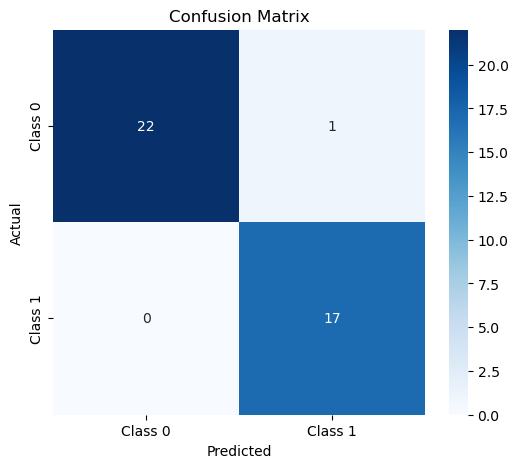

In [15]:
# Evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

En este bloque de codigo primero se empieza calculando el porcentaje de la precision siendo este de un 97%, despues hace una matriz de confsuon como estamos viendo mostrando los true postive, false positive, true negativa y false negative, despues hace una metrica detallada calculando la precision y el recall con dos diferentes formulas, despues se hacer una grafica represtando la matriz de confusion siendo los lados -x+y & x-y los lados que se supone que contienen los resultados que apuntan que todo esta bien por asi decirlo.

In [16]:
# Check the training score
train_score = knn.score(X_train_scaled, y_train_split)
print(f"Training Accuracy: {train_score:.4f}")

# Check the validation (test) score
val_score = knn.score(X_val_scaled, y_val)
print(f"Validation Accuracy: {val_score:.4f}")

Training Accuracy: 1.0000
Validation Accuracy: 0.9750


En este bloque de codigo solo se calcula la precision y/o score de los valores usados para entrenar y validar siendo exoresados en decimales, pues se puede ver que le fue bien al modelo KNN, no tomando en cuenta si hay overfitting como usted dijo en clase

In [17]:
# Predictions on test set
y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0])

Aqui no se si hubo un bug o algo parecido para parece que se estaba haciendo una prediccion para el modelo de prueba utilizando el modelo KNN pero solo arrojo un array que raro